## Imports & Setup

In [1]:
# Import base Libraries
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [2]:
# add the scripts directory to the python path,
# or the set of places the python interpreter looks for code files
import sys
sys.path.insert(0, './ds_helpers')

# now read in the functions
from helpers import filter_duplicate_col, read_in_dataset

In [3]:
# Set path to dataset
dataset_folder = '../datasets/zillow/'

In [4]:
# List files in dataset
!ls ../datasets/zillow/

properties_2016.csv
properties_2017.csv
sample_submission.csv
train_2016.csv
train_2017.csv
train_data_merged_2016.csv
train_data_merged_2016.p
zillow_data_dictionary.xlsx


In [5]:
df_train_merged = read_in_dataset(dataset_folder,"train_data_merged_2016.csv",True)

------------------------------------------

Reading in the train_data_merged_2016.csv dataset:

------------------------------------------

it has 90275 rows and 60 columns

------------------------------------------

It has the following columns: 

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'prope

## EDA

In [6]:
df_train_merged.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [7]:
df_train_merged.shape

(90275, 60)

In [8]:
# import & print Data Dictionary for terms
data_dictionary = pd.read_excel(f'{dataset_folder}/zillow_data_dictionary.xlsx')
data_dictionary

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


## Explore transaction dates

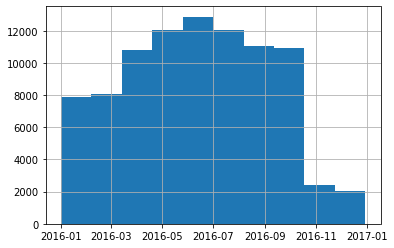

In [9]:
pd.to_datetime(df_train_merged.transactiondate).hist()

Above: as stated data near and after nov is with held in testing set

https://www.kaggle.com/c/zillow-prize-1

In [10]:
pd.to_datetime(df_train_merged.transactiondate).min()

Timestamp('2016-01-01 00:00:00')

In [11]:
pd.to_datetime(df_train_merged.transactiondate).max()

Timestamp('2016-12-30 00:00:00')

## Explore parcel (lot) duplicates

In [12]:
# check for more than one record per parcel (lot)
df_train_merged.parcelid.nunique() == len(df_train_merged)

False

In [13]:
# get counts per parcel ID
counts_per_parcel = df_train_merged.groupby('parcelid').size()

# Get parcel IDs that are recoded more than once
multiple_transaction = df_train_merged[df_train_merged.parcelid.isin(counts_per_parcel[counts_per_parcel > 1].index)]

# Get parcel IDs that are recorded only once
one_transaction = df_train_merged[df_train_merged.parcelid.isin(counts_per_parcel[counts_per_parcel == 1].index)]


In [14]:
# Print how many lots have multiple transactions
print(multiple_transaction.parcelid.nunique())

124


In [15]:
multiple_transaction.sort_values("parcelid").head(20)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
10828,10736972,-0.0460,2016-02-22,1.0,NaN,NaN,4.0,6.0,NaN,4.0,...,NaN,NaN,278410.0,352441.0,2015.0,74031.0,4415.55,NaN,NaN,6.037800e+13
10829,10736972,-0.0367,2016-12-14,1.0,NaN,NaN,4.0,6.0,NaN,4.0,...,NaN,NaN,278410.0,352441.0,2015.0,74031.0,4415.55,NaN,NaN,6.037800e+13
9177,10790468,-0.0450,2016-02-12,NaN,NaN,NaN,2.0,3.0,NaN,7.0,...,NaN,NaN,139505.0,417874.0,2015.0,278369.0,5314.55,NaN,NaN,6.037135e+13
9178,10790468,-0.0440,2016-09-13,NaN,NaN,NaN,2.0,3.0,NaN,7.0,...,NaN,NaN,139505.0,417874.0,2015.0,278369.0,5314.55,NaN,NaN,6.037135e+13
2226,10796614,-0.1267,2016-01-13,1.0,NaN,NaN,3.0,4.0,NaN,7.0,...,NaN,NaN,51584.0,90319.0,2015.0,38735.0,1196.48,NaN,NaN,6.037139e+13
2227,10796614,-0.0704,2016-06-14,1.0,NaN,NaN,3.0,4.0,NaN,7.0,...,NaN,NaN,51584.0,90319.0,2015.0,38735.0,1196.48,NaN,NaN,6.037139e+13
24522,10798910,-0.0471,2016-04-12,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,81968.0,122951.0,2015.0,40983.0,1577.25,NaN,NaN,6.037139e+13
24523,10798910,-0.0274,2016-05-24,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,81968.0,122951.0,2015.0,40983.0,1577.25,NaN,NaN,6.037139e+13
6291,10799924,0.0478,2016-01-29,1.0,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,81490.0,179450.0,2015.0,97960.0,2277.15,NaN,NaN,6.037139e+13
6292,10799924,0.4121,2016-08-09,1.0,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,81490.0,179450.0,2015.0,97960.0,2277.15,NaN,NaN,6.037139e+13


In [16]:
# Verify seperation was correct
assert len(df_train_merged) == (len(multiple_transaction) + len(one_transaction))

For this case study we are going to initially ramdomly select a single transaction per lot from the multiple transactions. 

We can come back and explore other options, however the overall size of the lots with multiple transactions is pretty small (124 out of 90,275) for our dataset.

In [17]:
# select random transaction from with from multiple
# Merge back into a single dataframe
df_train_reduced = multiple_transaction.sample(frac=1, random_state=0).groupby('parcelid').head(1)
df_train_reduced = pd.concat([one_transaction, df_train_reduced])

In [18]:
df_train_reduced.shape

(90150, 60)

In [19]:
# Verify we did not lose any parcel IDs from our train merged DF
assert set(df_train_reduced.parcelid) == set(df_train_merged.parcelid)

In [20]:
assert set(df_train_reduced["parcelid"]) == set(df_train_merged.parcelid)

In [21]:
df_train_reduced.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [22]:
df_train_reduced.shape

(90150, 60)

In [23]:
df_train_reduced = filter_duplicate_col(df_train_merged,"parcelid",True)


------------------------------------------

parcelid duplicates
124

------------------------------------------



In [24]:
df_train_reduced.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


## Check Null Values

In [27]:
# What columns have the most null values
df_train_reduced.isnull().sum().sort_values(ascending=False).head(20)

buildingclasstypeid         90134
finishedsquarefeet13        90117
basementsqft                90107
storytypeid                 90107
yardbuildingsqft26          90055
fireplaceflag               89930
architecturalstyletypeid    89890
typeconstructiontypeid      89852
finishedsquarefeet6         89731
decktypeid                  89492
poolsizesum                 89184
pooltypeid10                88991
pooltypeid2                 88946
taxdelinquencyyear          88375
taxdelinquencyflag          88375
hashottuborspa              87787
yardbuildingsqft17          87505
finishedsquarefeet15        86595
finishedsquarefeet50        83300
finishedfloor1squarefeet    83300
dtype: int64

In [28]:
# What Columns have the least null values
df_train_reduced.isnull().sum().sort_values(ascending=True).head(20)

parcelid                        0
longitude                       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcounty                  0
roomcnt                         0
latitude                        0
fips                            0
bathroomcnt                     0
assessmentyear                  0
transactiondate                 0
logerror                        0
bedroomcnt                      0
taxvaluedollarcnt               1
landtaxvaluedollarcnt           1
propertycountylandusecode       1
taxamount                       6
regionidzip                    35
structuretaxvaluedollarcnt    378
censustractandblock           603
dtype: int64

## Check Unique Values

In [30]:
# Look for High Cardinality values
df_train_reduced.nunique().sort_values(ascending=False).head(30)

parcelid                        90150
taxamount                       85110
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57066
taxvaluedollarcnt               55938
structuretaxvaluedollarcnt      55450
rawcensustractandblock          42643
censustractandblock             42398
lotsizesquarefeet               20016
calculatedfinishedsquarefeet     5102
finishedsquarefeet12             4982
propertyzoningdesc               1996
finishedsquarefeet15             1915
finishedsquarefeet50             1898
logerror                         1893
finishedfloor1squarefeet         1886
garagetotalsqft                   870
yardbuildingsqft17                567
regionidneighborhood              494
regionidzip                       388
finishedsquarefeet6               360
transactiondate                   352
poolsizesum                       273
regionidcity                      177
yearbuilt                         130
propertycoun

In [38]:
# Look for values with no variation 
df_train_reduced.nunique(dropna=False).sort_values(ascending=True).head(20)

assessmentyear              1
poolcnt                     2
storytypeid                 2
fireplaceflag               2
pooltypeid7                 2
pooltypeid2                 2
buildingclasstypeid         2
pooltypeid10                2
decktypeid                  2
taxdelinquencyflag          2
hashottuborspa              2
regionidcounty              3
fips                        3
typeconstructiontypeid      4
threequarterbathnbr         5
numberofstories             5
fireplacecnt                6
airconditioningtypeid       7
architecturalstyletypeid    7
buildingqualitytypeid       9
dtype: int64

## Check target values

In [41]:
df_train_reduced.logerror

0        0.0276
1       -0.1684
2       -0.0040
3        0.0218
4       -0.0050
          ...  
15044   -0.2614
53240    0.7738
45629    0.0478
29680    0.0760
35498    0.0944
Name: logerror, Length: 90150, dtype: float64

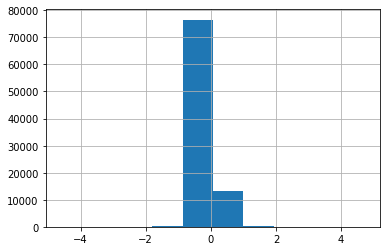

In [34]:
df_train_reduced.logerror.hist()

In [ ]:
# Laplace distribution
# https://en.wikipedia.org/wiki/Laplace_distribution

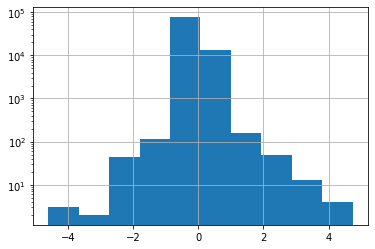

In [36]:
fig, ax = plt.subplots()
df_train_reduced.logerror.hist(ax=ax)
ax.set_yscale('log')